Name: Reshma Jawale

# Prediction using Supervised Machine Learning

## **Linear Regression with Python Scikit Learn**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. I have used Python for the regression task.

## Importing necessary libraries

In [50]:
# Importing all necessary libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading the Dataset

In [51]:
# Reading data from remote link

url='http://bit.ly/w-data'
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Sanity

In [52]:
print(f'The Shape of the DataFrame is: {s_data.shape}')
print(f'The number of rows in the DataFrame are: {s_data.shape[0]}')
print(f'The number of columns in the DataFrame are: {s_data.shape[1]}')

The Shape of the DataFrame is: (25, 2)
The number of rows in the DataFrame are: 25
The number of columns in the DataFrame are: 2


In [53]:
print('The basic information of the dataframe is as follows: \n')
s_data.info()

The basic information of the dataframe is as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see the datatype of variable Hours is float and Scores is int

## EDA

In [72]:
# Step1: Checking for null values
print('The null value count in the dataset is:\n')
s_data.isna().sum()

The null value count in the dataset is:



Hours     0
Scores    0
dtype: int64

As we can see above, we do not have any null values.

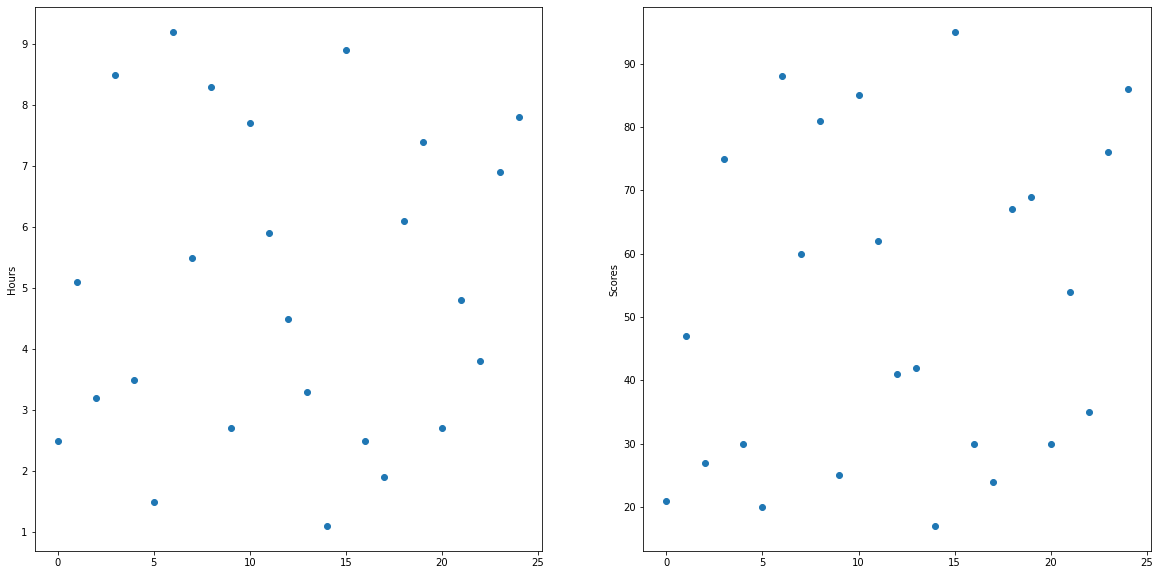

In [55]:
# Step2: Visualization of data to see relationship between feature and target variable
numeric_columns= s_data.select_dtypes(include=np.number)
col_names=list(numeric_columns)
column_index=0
rows=1
columns=2
fig,ax=plt.subplots(ncols=columns,nrows=rows, figsize=(20,10),squeeze=False)
for i in range(rows):
    for j in range(columns):
        ax[i][j].scatter(x=s_data.index,y=numeric_columns[col_names[column_index]])
        ax[i][j].set_ylabel(col_names[column_index])
        column_index +=1

Text(0.5, 1.0, 'Hours VS Scores')

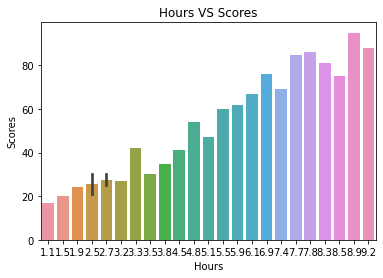

In [56]:
sns.barplot(x=s_data['Hours'], y=s_data['Scores'])
plt.title("Hours VS Scores")

So, we can see that as hours increases, scores also increase.

<AxesSubplot:xlabel='Hours'>

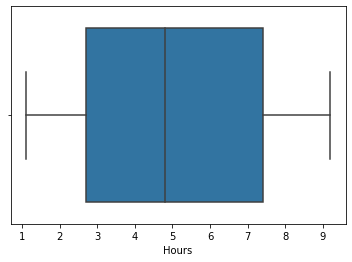

In [57]:
# Step 3: Check for outliers

sns.boxplot(x=s_data['Hours'])

<AxesSubplot:xlabel='Scores'>

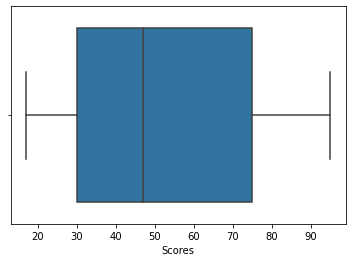

In [58]:
sns.boxplot(x=s_data['Scores'])

As we can see that there are no outliers present in the variable. If the outliers are present we can either dropped it of or capped it to smaller value.

Now we plot our data on 2-D graph to eyeball our dataset and see if we can manually find any relationships between the data.

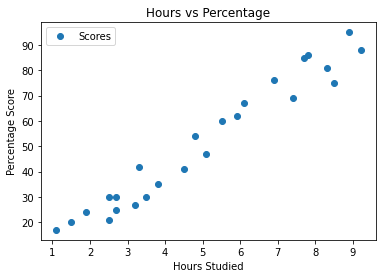

In [59]:
# Plotting the distribution of scores

s_data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the graph above, we can clearly see that there is a positive correlation between the number of hours studied and percentage of scores.

## Preparing the Data

The next step is to divide the data into "attributes"(inputs) and "labels"(output)

In [60]:
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Observe the shape of each train and test data set.

In [62]:
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

The shape of X_train is: (20, 1)
The shape of X_test is: (5, 1)
The shape of y_train is: (20,)
The shape of y_test is: (5,)


## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [63]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Complete..")

Training Complete..


In [64]:
print('The intercept is:', regressor.coef_)
print('The regression coefficient is:', regressor.intercept_)

The intercept is: [9.91065648]
The regression coefficient is: 2.018160041434683


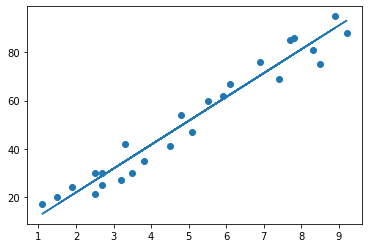

In [65]:
# Plotting the regression line.

line = regressor.coef_*X+regressor.intercept_

#Plotting the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [66]:
print(X_test) #Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [67]:
y_pred = regressor.predict(X_test) #Predicting the score

In [68]:
# Comparing Actual VS Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have chosen the mean square error.

In [70]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


### Q. What will be the predicted score if student study for 9.5hours/day ?

In [69]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
